# PCA on MNIST

In [48]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.datasets import load_digits

### Loading in data

In [9]:
# Get the current working directory
current_dir = os.getcwd()

# Navigate to the parent directory
data_dir = os.path.abspath(os.path.join(current_dir, os.pardir, 'Pset3', 'data'))

In [10]:
# loading in data
file_path_train = os.path.join(data_dir, "mnist_train.csv")
file_path_test = os.path.join(data_dir, "mnist_test.csv")

train_df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)

x_train = train_df.drop('label', axis = 1)
y_train = train_df['label']

x_test = test_df.drop('label', axis = 1)
y_test = test_df['label']

### Data Preprocessing
We need to normalize the data by dividing everything but the label by 255. 255 because we're working with computer vision.

In [11]:
# Divide all of predictors by 255
x_train = x_train/255
x_test = x_test/255

### Starting the PCA

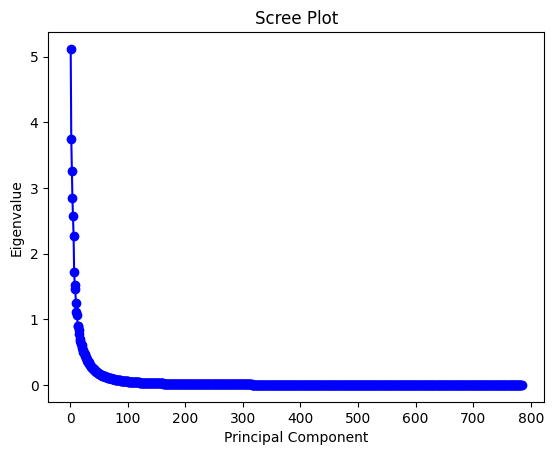

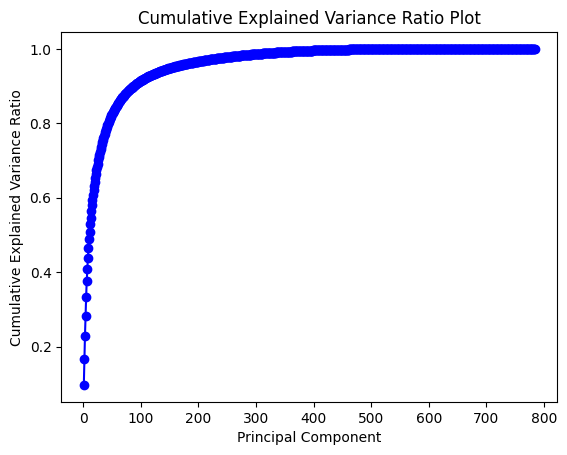

In [17]:
# fitting the PCA
pca = PCA()
pca.fit(x_train)

# Extract the eigenvalues or explained variance ratios
eigenvalues = pca.explained_variance_
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratios
cumulative_variance_ratios = np.cumsum(explained_variance_ratios)

# Plot the scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratios) + 1), cumulative_variance_ratios, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio Plot')
plt.show()

In [30]:
# getting total number of principal components
num_pcs = x_train.shape[1]

# pca.transform returns a numpy array
pca_train = pca.transform(x_train)[:, :num_pcs]
pca_test = pca.transform(x_test)[:, :num_pcs]

# we turn the numpy array into a pandas dataframe
pca_train_df = pd.DataFrame(pca_train, columns=[f"PC{i+1}" for i in range(num_pcs)])
pca_test_df = pd.DataFrame(pca_test, columns=[f"PC{i+1}" for i in range(num_pcs)])

Let's add the labels back into.

In [31]:
# Insert the new column at the front
pca_train_df.insert(0, 'label', y_train)
pca_test_df.insert(0, 'label', y_test)

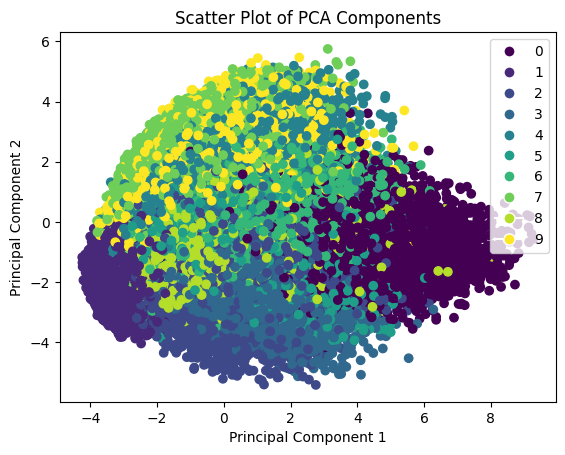

In [35]:
# Create the scatter plot
scatter = plt.scatter(pca_train_df['PC1'], pca_train_df['PC2'], c=pca_train_df['label'], cmap='viridis')

# Create a legend with labeled markers or colored patches
legend_elements = []
unique_labels = set(pca_train_df['label'])
for label in unique_labels:
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=label,
                                      markerfacecolor=scatter.cmap(scatter.norm(label)),
                                      markersize=8))

# Add the legend to the plot
plt.legend(handles=legend_elements)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA Components')
plt.show()

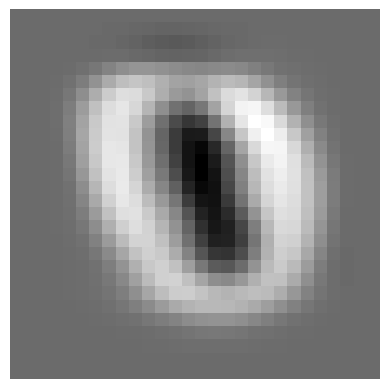

In [71]:
def show_digit(arr784, col='gray', **kwargs):
    # Extract the pixel values (excluding the label)
    pixel_values = arr784#[:-1]

    # Reshape the pixel values into a 28x28 matrix
    image = np.reshape(pixel_values, (28, 28))

    # Display the image using grayscale colormap
    plt.imshow(image[::-1], cmap=col, **kwargs)
    plt.axis('off')
    plt.show()

rotation_matrix = pca.components_
first_component = rotation_matrix[0, :]
show_digit(first_component)